Predict Temp

In [58]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [9]:
dataset= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [10]:
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
dataset[dataset.isnull().any(axis=1)]

<bound method DataFrame.reset_index of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   

In [ ]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [15]:
df['Region']= df['Region'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [16]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [17]:
df=df.dropna().reset_index(drop=True)

In [ ]:
df.isnull.sum()
df.info()
df.head()

In [27]:
df['day'].str.isnumeric().sum()
df[~df['day'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [29]:
df= df.drop(index=122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [30]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [32]:
df.columns= df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [33]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
numeric = ['day','month','year','Temperature','RH','Ws','Ws']
floattt= ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']
for col in df.columns:
    if col in numeric:
        df[col]=df[col].astype(int)
    elif col in floattt:
        df[col]=df[col].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [ ]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1).astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    int32  
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 20.9 KB


In [45]:
df.to_csv('Algerian_forest_fires_dataset_Cleaned.csv',index=False)

##EDA

In [51]:
dt= df.drop(['day','month','year'],axis=1)

In [62]:
import seaborn as sns
sns.heatmap(dt.corr(),annot=True)

<Axes: >

In [53]:
dt.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [54]:
dt['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'show'

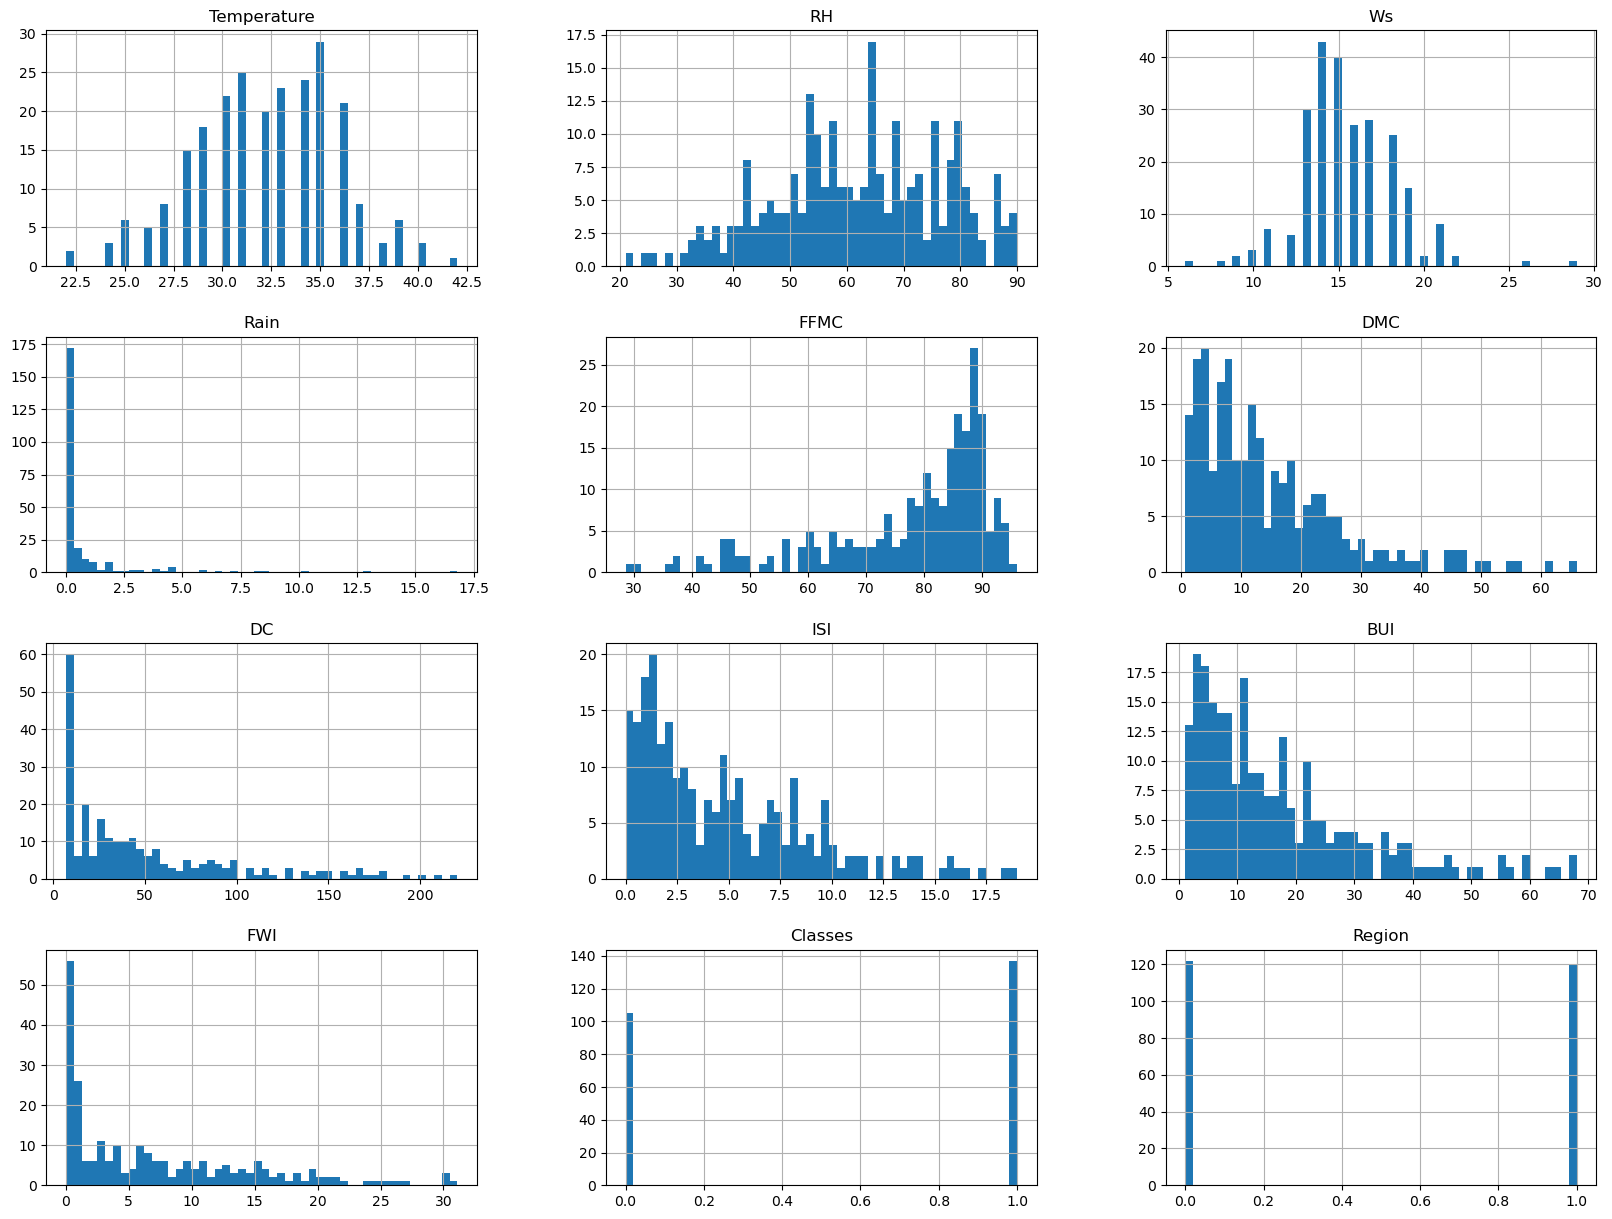

In [56]:
dt.hist(bins=50,figsize=(20,15))
plt.show()

In [66]:
sns.heatmap(dt.corr(),annot=True)

<Axes: >